In [ ]:
import pandas as pd
import pub_utils as pu

# Path to your data file - adjust as needed
DATA_PATH = '../data/RipollSanchez2023/neuroanatomy.csv'
OUTPUT_PATH = '../connectomes/neuron_features.csv'

# Create the NeuronFeatures object
df = pd.read_csv(DATA_PATH)
nf = pu.NeuronFeatures(df)

# Print summary
print(nf.summary())

# Save to pickle
nf.save(OUTPUT_PATH)

# Demonstrate loading
nf_loaded = pu.NeuronFeatures.load(OUTPUT_PATH)
print(f"\nLoaded object: {nf_loaded}")

NeuronFeatures Summary
Total neuron classes: 302
Total features: 49

Feature breakdown by category:
  cellType: 5 features
  sensoryType: 12 features
  segment: 3 features
  process: 29 features
Saved NeuronFeatures to ../processed/neuron_features.pkl
Loaded NeuronFeatures from ../processed/neuron_features.pkl

Loaded object: NeuronFeatures(n_neurons=302, n_features=49)


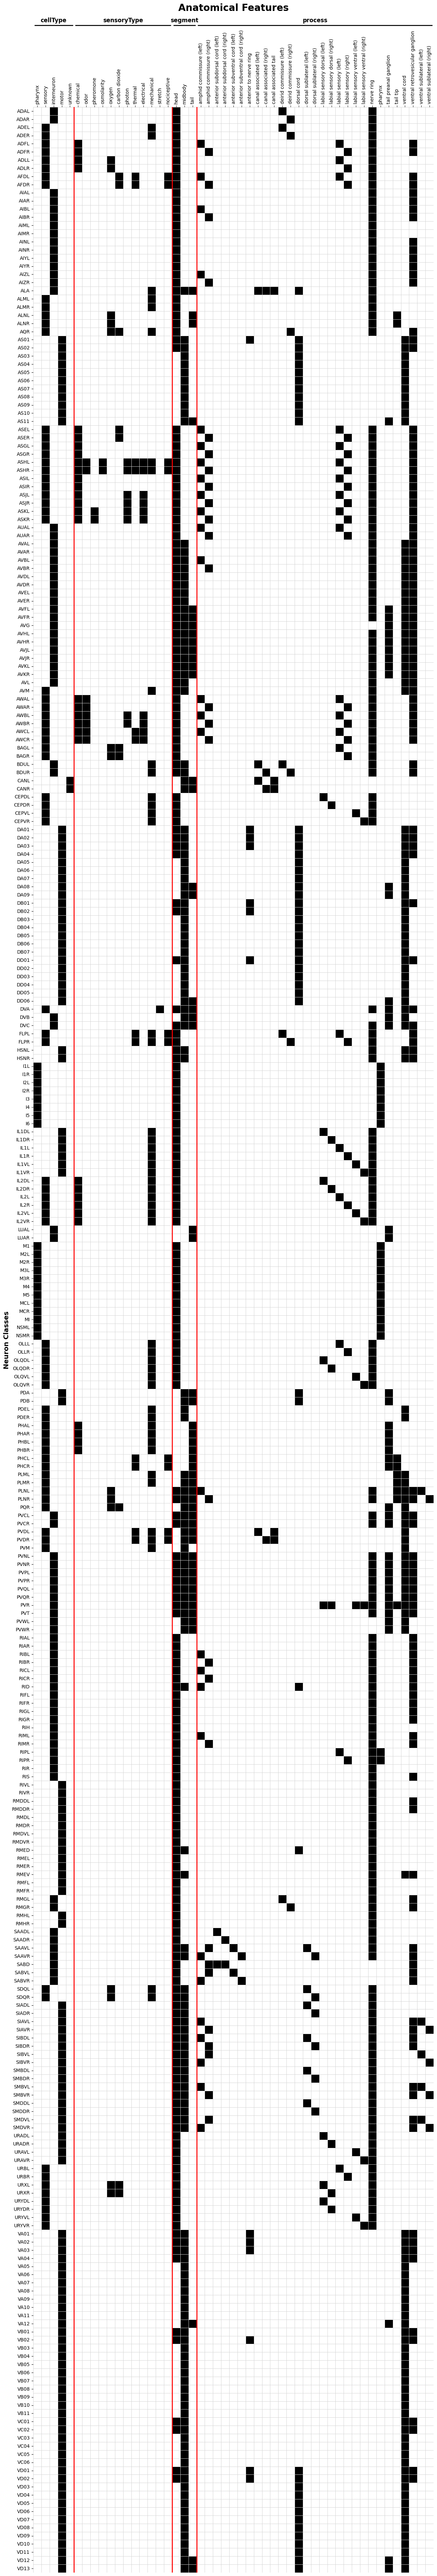

Total neuron classes: 302
Total features: 49
Feature breakdown: cellType=5, sensoryType=12, segment=3, process=29


In [3]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def reformat_label(label):
    """Reformat feature labels: remove prefix and format nicely"""
    if ':' in label:
        prefix, suffix = label.split(':', 1)
        suffix = suffix.replace('_', ' ')
        if suffix.endswith(' left'):
            suffix = suffix.replace(' left', ' (left)')
        elif suffix.endswith(' right'):
            suffix = suffix.replace(' right', ' (right)')
        return suffix
    return label


def plot_neuron_features(nf, output_path='neuron_features.png'):
    """
    Reproduce the anatomical features heatmap from NeuronFeatures object.
    
    Args:
        nf: NeuronFeatures object loaded from pickle
        output_path: Path to save the output figure
    """
    # Get data from NeuronFeatures object
    heatmap_data = pd.DataFrame(
        nf.feature_matrix,
        index=nf.neuron_ids,
        columns=nf.feature_names
    )
    
    # Get category column lists
    cellType_cols = nf.feature_categories['cellType']
    sensoryType_cols = nf.feature_categories['sensoryType']
    segment_cols = nf.feature_categories['segment']
    process_cols = nf.feature_categories['process']
    
    # Create reformatted labels for x-axis
    reformatted_labels = [reformat_label(col) for col in nf.feature_names]
    
    # Get dimensions
    n_neurons = len(nf.neuron_ids)
    n_features = len(nf.feature_names)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 32))
    
    # Create heatmap with thin grey gridlines
    sns.heatmap(heatmap_data, 
                cmap='Greys', 
                cbar=False, 
                linewidths=0.5,
                linecolor='lightgray',
                xticklabels=reformatted_labels,
                yticklabels=True,
                ax=ax)
    
    ax.set_aspect('equal')
    
    # Bold title and axis labels
    ax.set_title('Anatomical Features', fontsize=20, fontweight='bold', pad=40)
    ax.set_ylabel('Neuron Classes', fontsize=14, fontweight='bold')
    
    # Move x-axis labels to top
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, ha='center')
    plt.yticks(rotation=0)
    
    # Calculate positions for vertical separators between feature blocks
    x_positions = [
        len(cellType_cols), 
        len(cellType_cols) + len(sensoryType_cols),
        len(cellType_cols) + len(sensoryType_cols) + len(segment_cols)
    ]
    
    for pos in x_positions:
        ax.axvline(pos, color='red', linewidth=2)
    
    # Add category labels above the heatmap with bracketing lines
    category_info = [
        ('cellType', 0, len(cellType_cols)),
        ('sensoryType', len(cellType_cols), len(cellType_cols) + len(sensoryType_cols)),
        ('segment', len(cellType_cols) + len(sensoryType_cols), 
         len(cellType_cols) + len(sensoryType_cols) + len(segment_cols)),
        ('process', len(cellType_cols) + len(sensoryType_cols) + len(segment_cols), 
         n_features)
    ]
    
    # Position for category labels
    y_line = -10
    y_text = -11
    
    for category_name, start_pos, end_pos in category_info:
        if end_pos > start_pos:
            center_pos = (start_pos + end_pos) / 2
            
            # Horizontal line
            ax.plot([start_pos + 0.2, end_pos - 0.2], [y_line, y_line], 
                    color='black', linewidth=2, clip_on=False)
            
            # Add category label
            ax.text(center_pos, y_text, category_name, 
                    ha='center', va='top', fontsize=12, fontweight='bold',
                    clip_on=False)
    
    plt.tight_layout()
    plt.subplots_adjust(top=2.5)
    
    plt.savefig(output_path, dpi=600, bbox_inches='tight')
    plt.show()
    
    # Print info about the data
    print(f"Total neuron classes: {n_neurons}")
    print(f"Total features: {n_features}")
    print(f"Feature breakdown: cellType={len(cellType_cols)}, "
          f"sensoryType={len(sensoryType_cols)}, segment={len(segment_cols)}, "
          f"process={len(process_cols)}")


# Load the NeuronFeatures object from pickle
PICKLE_PATH = '../processed/neuron_features.pkl'
OUTPUT_PATH = '../plots/neuron_features.png'

with open(PICKLE_PATH, 'rb') as f:
    nf = pickle.load(f)


# Generate the plot
plot_neuron_features(nf, OUTPUT_PATH)